IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Ilyes DJERFAF\
Anyes TAFOUGHALT

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [2]:
np.random.seed(42) # pour reproduire les mêmes tirages aléatoires

## Introduction

************************* on ecrit un petit text pour décrire agribalise *********************************** 

et a la fin on va dire qu'on va travailler sur 2 prbleme : 
1 - supervisé 
2 - non supervisé 

les étapes à suivre sont comme vu en cours : 
- etape 1 : acquisition 
    
- etape 2 : ....

la partie commune entre les deux problemes c'est etape et etape 2

## Etape 1 : Acquisition des données

In [30]:
# lecture des données:
dataframe = pd.read_csv("data/AGRIBALYSE3-synthese.csv",sep=";")
dataframe_unsupervised = dataframe.copy()
dataframe.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.52,12.70,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.02,6.23,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.29,12.60,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088


In [4]:
# Statistiques Descriptive
dataframe.describe()

,Code CIQUAL,code saison,code avion,DQR,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2.517000e+03,...,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,22121.732618,1.997616,0.000795,2.768164,0.688960,5.420520,5.383362e-07,1.016822,0.021626,5.735583e-07,...,3.885454e-09,0.078953,0.000842,0.028194,0.310529,54.213324,328.598126,5.726230,49.799158,2.201983e-05
std,13835.394294,0.062999,0.028183,0.553206,0.877068,7.760284,4.868753e-06,1.595941,0.044096,8.893528e-07,...,4.773390e-09,0.128077,0.002039,0.050167,0.532352,65.129370,663.745740,18.063484,54.560796,4.340914e-05
min,1.000000,0.000000,0.000000,1.200000,0.013000,0.039400,2.710000e-09,0.023000,0.000120,5.370000e-09,...,5.850000e-11,0.000499,0.000013,0.000213,0.001140,0.678000,-40.000000,-23.100000,1.710000,6.180000e-07
25%,12726.000000,2.000000,0.000000,2.380000,0.161000,1.120000,1.200000e-07,0.302000,0.003570,8.110000e-08,...,9.600000e-10,0.009500,0.000203,0.005310,0.034100,13.500000,33.600000,0.905000,19.900000,7.270000e-06
50%,20500.000000,2.000000,0.000000,2.680000,0.356000,2.500000,2.060000e-07,0.670000,0.007240,2.370000e-07,...,2.360000e-09,0.031200,0.000444,0.012800,0.118000,34.100000,126.000000,2.090000,30.800000,1.280000e-05
75%,26090.000000,2.000000,0.000000,3.090000,0.874000,6.280000,5.650000e-07,1.100000,0.018000,7.060000e-07,...,5.020000e-09,0.094200,0.000862,0.028600,0.327000,63.900000,306.000000,5.410000,61.200000,2.480000e-05
max,96778.000000,2.000000,1.000000,4.870000,5.970000,52.200000,2.430000e-04,30.400000,0.390000,6.240000e-06,...,6.370000e-08,0.920000,0.032700,0.671000,4.070000,1090.000000,5580.000000,478.000000,711.000000,1.290000e-03


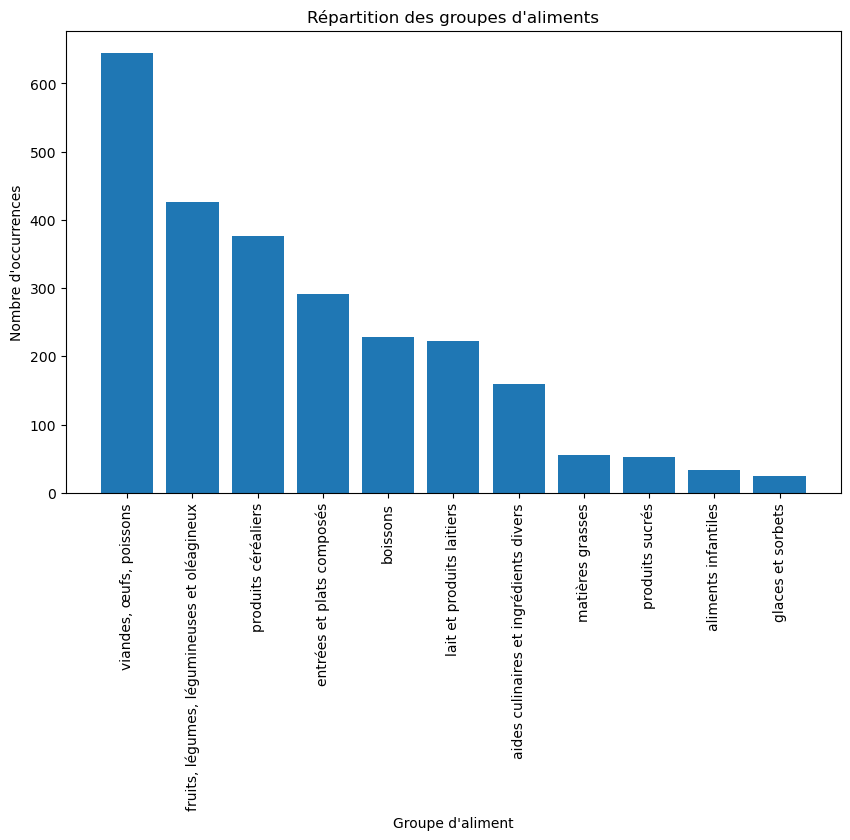

In [5]:
# Compter le nombre d'occurrences de chaque groupe d'aliments
groupes_aliments = dataframe['Groupe d\'aliment'].value_counts()

# Tracer le diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(groupes_aliments.index, groupes_aliments.values)
plt.xlabel('Groupe d\'aliment')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des groupes d\'aliments')
plt.xticks(rotation=90)
plt.show()


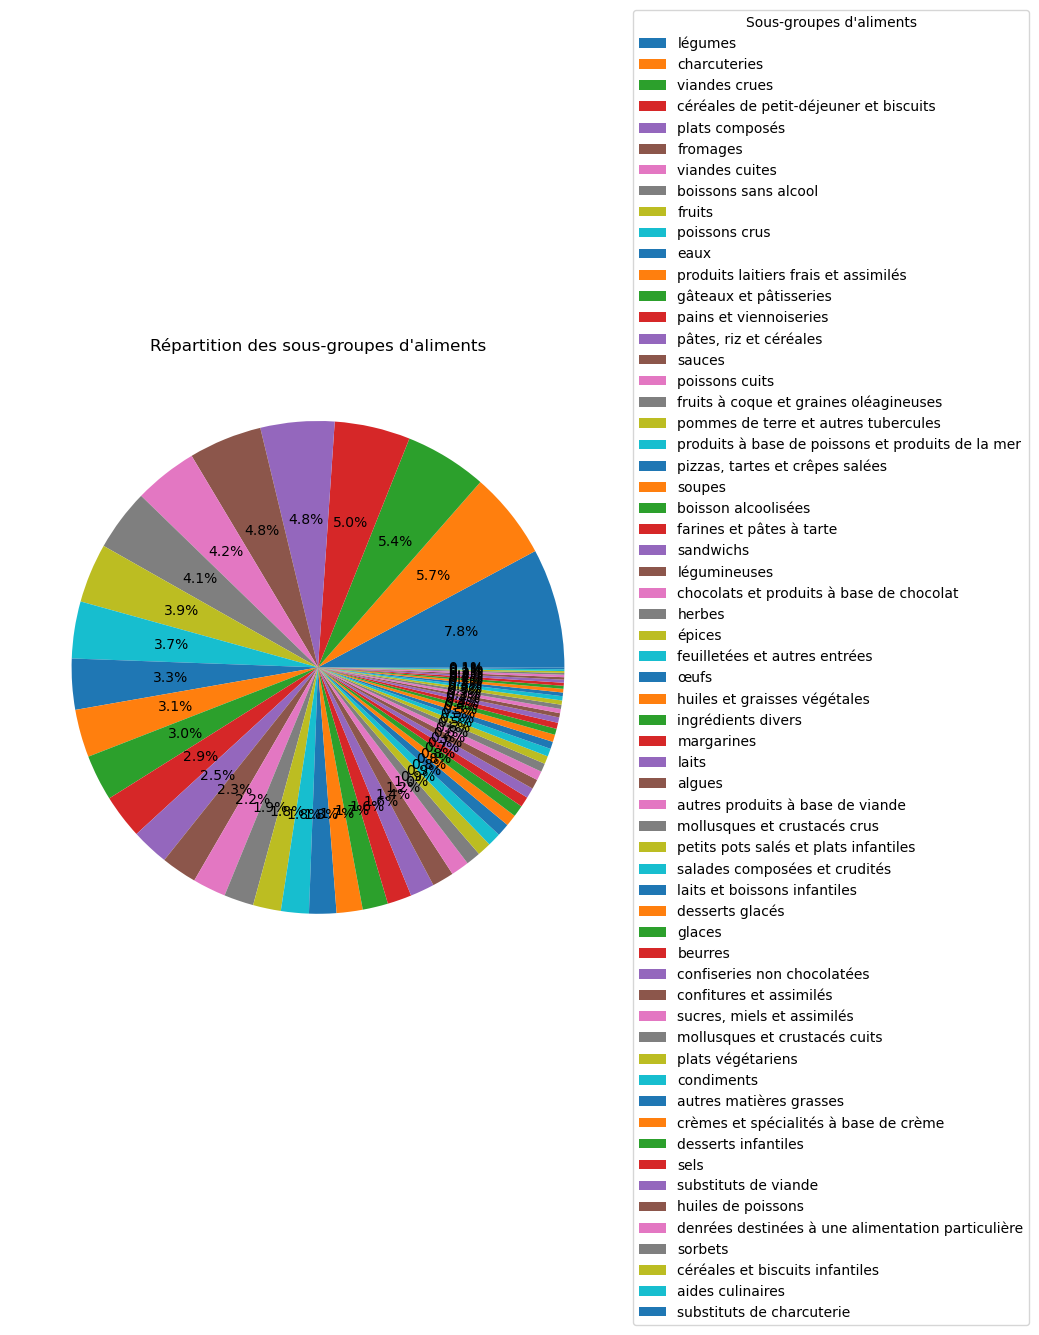

In [6]:
# Compter le nombre d'occurrences de chaque sous-groupe d'aliments
sous_groupes_aliments = dataframe['Sous-groupe d\'aliment'].value_counts()

# Tracer le diagramme circulaire
plt.figure(figsize=(8, 8))
_, _, autopcts = plt.pie(sous_groupes_aliments.values, autopct='%1.1f%%')

# Créer une légende pour chaque sous-groupe
labels = sous_groupes_aliments.index
plt.legend(labels, title='Sous-groupes d\'aliments',
           loc='center left', bbox_to_anchor=(1, 0.5))

# Afficher les pourcentages à l'intérieur du diagramme
for autopct in autopcts:
    autopct.set_size(10)

plt.title('Répartition des sous-groupes d\'aliments')

plt.show()


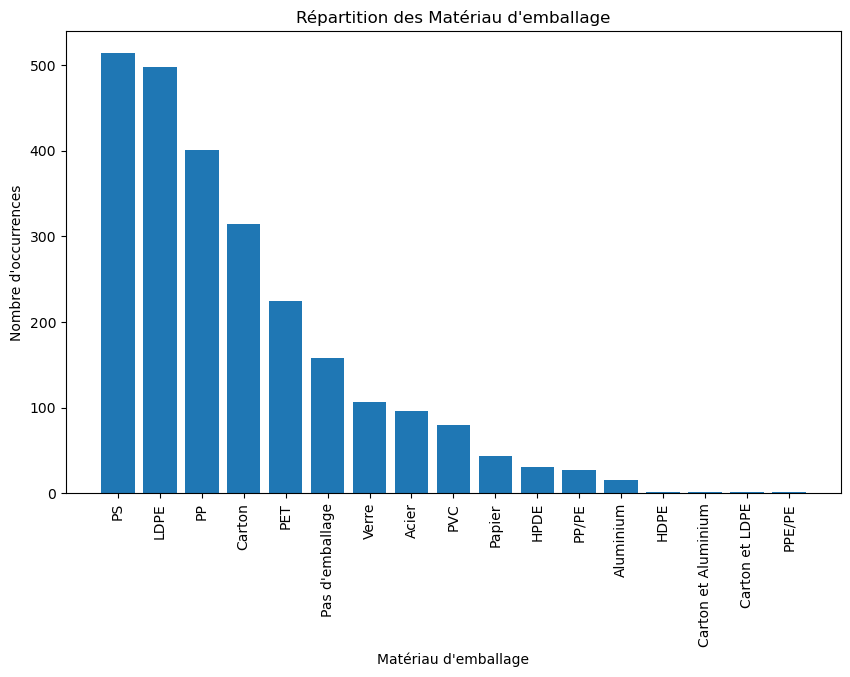

In [7]:
# Diagramme en barres pour les groupes d'aliments :
## Compter le nombre d'occurrences de chaque groupe d'aliments
mat_emb = dataframe["Matériau d'emballage"].value_counts()

# Tracer le diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(mat_emb.index, mat_emb.values)
plt.xlabel("Matériau d'emballage")
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des Matériau d\'emballage')
plt.xticks(rotation=90)
plt.show()


# <font size="+3" color="RED"><b> 2. Problème Non Supervisé : Etude de l'Impact Environnemental des types d'Emballages dans l'Industrie Agroalimentaire et les Effets toxicologiques sur la santé humaine : substances non cancérogènes</b></font> 

La problématique que nous allons traiter avec l'apprentissage non supervisé est la suivante :

<font color="RED">**Etude de l'Impact Environnemental des types d'Emballages dans l'Industrie Agroalimentaire et les Effets toxicologiques sur la santé humaine : substances non cancérogènes**</font>

Pour y arriver, nous avons effectué les étapes suivantes :

* <font color="BLUE">**1. Pré-traitement des données**</font> :

Le pré-traitement des données est une étape essentielle pour préparer les inputs à un algorithme de clustering. Dans notre projet, nous avons suivi les étapes suivantes :

* <font color="BLUE">**1.1 Gestion des valeurs manquantes**</font> :

Nous avons identifié les valeurs manquantes dans notre jeu de données, représentées par "NaN" ou "None". Nous avons décidé de supprimer les colonnes qui étaient non nécessaires directement. Pour supprimer les colonnes dont les valeurs peuvent être déterminées par d'autres colonnes, nous avons utilisé la matrice de corrélation pour prendre cette décision de manière objective.

* <font color="BLUE">**1.2 Encodage des variables catégorielles**</font> :

L'une de nos colonnes, "emballage", n'était pas numérique. Nous avons donc opté pour l'encodage des variables catégorielles. Nous avons d'abord testé l'encodage "one-hot", qui crée des colonnes binaires pour chaque catégorie. Cependant, nous avons finalement choisi le label encoding, qui attribue des étiquettes numériques à chaque catégorie. Cela a permis de conserver la relation d'ordre entre les catégories.

* <font color="BLUE">**1.3 Normalisation des données**</font> :

Après avoir encodé les variables catégorielles, nous avons procédé à la normalisation des données. Nous avons utilisé la méthode StandardScaler de la bibliothèque scikit-learn pour normaliser les valeurs. Cette normalisation a permis d'obtenir une bonne distribution des données, en les ramenant à une échelle commune. Nous avons également testé la méthode de normalisation Min-Max, mais nous avons constaté que StandardScaler donnait de meilleurs résultats dans notre cas.

* <font color="BLUE">**2. Visualisation des données prétraitées**</font> :

Après le pré-traitement des données, nous avons utilisé la fonction pairplot de la bibliothèque seaborn pour visualiser les relations entre les variables prétraitées. Cette visualisation nous a permis de cibler un sous-groupe de données qui serait notre input pour l'algorithme de clustering non supervisé.

* <font color="BLUE">**3. Application de l'algorithme K-moyennes**</font> :

Nous avons appliqué l'algorithme K-moyennes sur les colonnes prétraitées "emballages" (encodée) et "effets toxiques non cancérogènes" (normalisée). L'algorithme K-moyennes est un algorithme de clustering non supervisé qui permet de regrouper les données en fonction de leur similarité.

* <font color="BLUE">**Finalement : Recherche des paramètres optimaux de K**</font> :

Nous avons cherché les paramètres optimaux de K, c'est-à-dire le nombre optimal de clusters, en utilisant l'inertie globale comme mesure d'évaluation. Nous avons testé plusieurs valeurs de K, et nous avons sélectionné celle qui minimisait l'inertie globale. L'inertie globale mesure la cohésion des clusters, plus elle est faible, plus les clusters sont compacts et homogènes.

## 2.1 Pre-traitement de données

### Gérer les valeurs manquantes

In [31]:
# Vérifier s'il existe des valeurs manquantes
if dataframe_unsupervised.isnull().values.any():
    # Supprimer les lignes contenant des valeurs manquantes
    dataframe_unsupervised = dataframe_unsupervised.dropna()
    # Remplacer les valeurs manquantes par la moyenne de la colonne
    dataframe_unsupervised = dataframe_unsupervised.fillna(dataframe.mean())


### Supprimer les colonnes non pertinentes

- On va procéder par deux étapes la première sert à supprimer directement les colonnes qu'on est sur de les supprimer.

- La deuxième, grace à la matrice de corrélation, supprimer les colonnes qui peuvent être déduite (avec une fort corrélation) à partir des autres : Relation entre variable

#### Suppression Directe

In [34]:
df = dataframe_unsupervised.copy()
df.columns = ['AGB', 'CIQUAL', 'Groupe', 'Sous-groupe',
              'Nom', 'LCI', 'saison', 'avion',
              'Livraison', 'Mat-emballage', 'Preparation', 'DQR',
              'Score', 'Changement climatique',
              'Appauvrissement de la couche ozone', 'Rayonnements ionisants',
              'Formation photochimique ozone', 'Particules fines',
              'Effets non-cancero',  # Nouveau nom pour la colonne renommée
              'Effets cancero',
              'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
              'Eutrophisation marine', 'Eutrophisation terrestre',
              'Écotoxicité pour écosystèmes aquatiques eau douce',
              'Utilisation du sol', 'Épuisement des ressources eau',
              'Épuisement des ressources énergétiques',
              'Épuisement des ressources minéraux']

# Liste des colonnes à supprimer
colonnes_a_supprimer = ['AGB', 'CIQUAL', 'Nom', 'LCI', 'saison', 'avion', 'Livraison',
                        'Preparation', 'DQR', 'Score', "Groupe", "Sous-groupe"]

# Supprimer les colonnes du DataFrame
df = df.drop(colonnes_a_supprimer, axis=1)

# Afficher les 5 premières lignes du DataFrame
df.head()


,Mat-emballage,Changement climatique,Appauvrissement de la couche ozone,Rayonnements ionisants,Formation photochimique ozone,Particules fines,Effets non-cancero,Effets cancero,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,LDPE,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088
1,Verre,0.749,1.230000e-07,0.171,0.00293,8.250000e-08,1.170000e-08,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.52,12.70,0.000007
2,Pas d'emballage,0.356,5.450000e-08,0.143,0.00107,2.330000e-08,7.450000e-09,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.02,6.23,0.000004
3,LDPE,0.815,6.270000e-08,0.141,0.00256,6.900000e-08,1.200000e-08,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.29,12.60,0.000005
4,LDPE,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088


#### Relations entre les variables : Matrice  de corrélation et heatmap

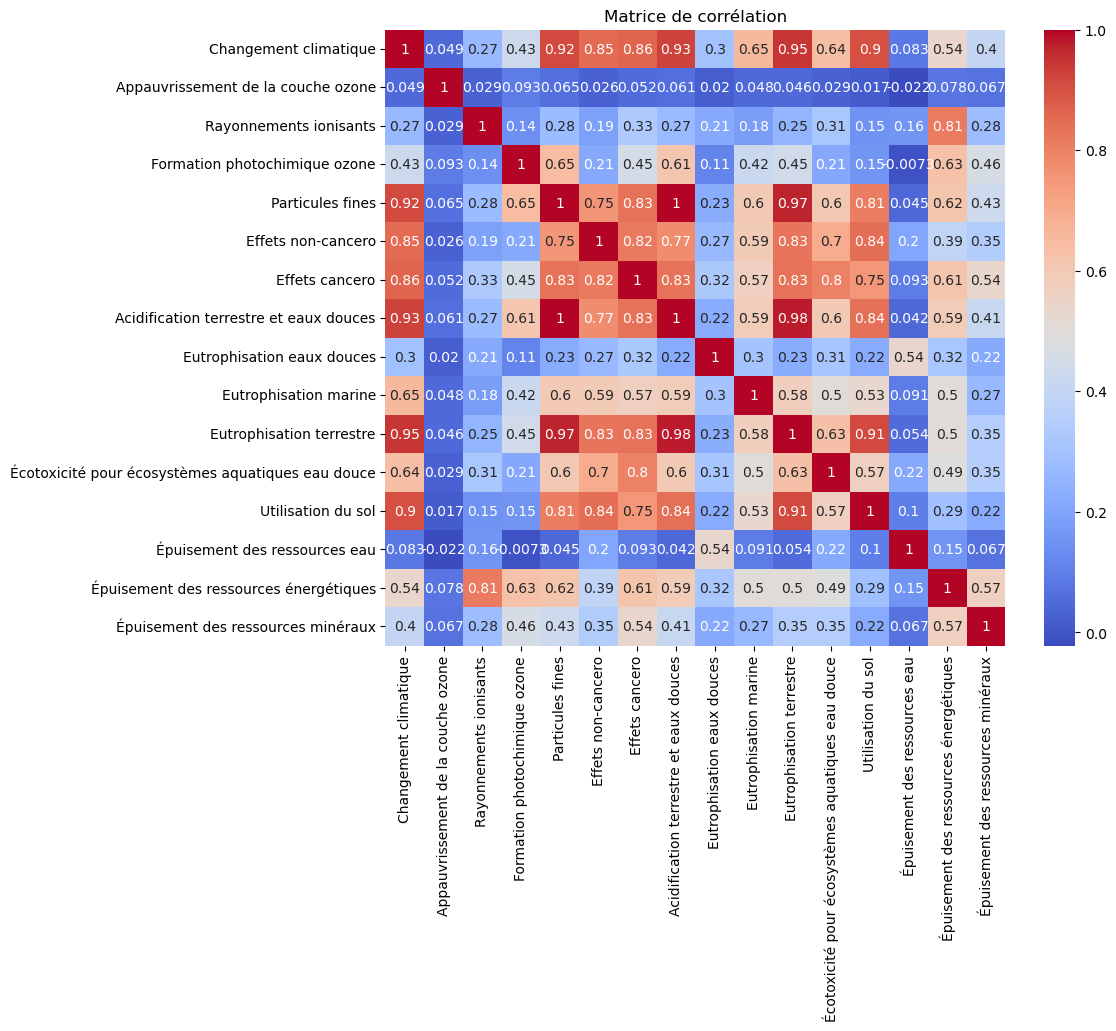

In [35]:
def matrice_corr(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Matrice de corrélation')
    plt.show()
    return corr_matrix

m = matrice_corr(df)

Lorsque vous exécutez le code pour créer et afficher la matrice de corrélation à l'aide d'un heatmap, vous obtenez une visualisation qui vous permet d'interpréter les relations linéaires entre les variables continues de votre ensemble de données.

Voici comment interpréter la matrice de corrélation :

- Les carrés colorés dans le heatmap représentent les valeurs de corrélation entre les paires de variables. Les couleurs représentent l'intensité de la corrélation, allant du bleu (corrélation négative) au rouge (corrélation positive).

- Les chiffres à l'intérieur des carrés représentent les coefficients de corrélation. Les valeurs varient de -1 à 1, où -1 indique une corrélation négative parfaite, 0 indique aucune corrélation et 1 indique une corrélation positive parfaite.

- Les carrés diagonaux (en partant du coin supérieur gauche jusqu'au coin inférieur droit) affichent des valeurs de corrélation de 1, ce qui est attendu car ils représentent la corrélation d'une variable avec elle-même.

- Vous pouvez utiliser la légende à côté du heatmap pour interpréter rapidement les couleurs et les valeurs de corrélation associées.

L'interprétation de la matrice de corrélation consiste à identifier les relations linéaires entre les variables continues. Voici quelques points à prendre en compte lors de l'interprétation :

- Les valeurs proches de 1 ou -1 indiquent une corrélation forte entre les variables. Par exemple, une valeur proche de 1 signifie une corrélation positive forte, ce qui suggère que lorsque la valeur d'une variable augmente, l'autre variable a tendance à augmenter également.

- Les valeurs proches de 0 indiquent une corrélation faible ou nulle. Cela signifie qu'il y a peu ou pas de relation linéaire entre les variables.

- Vous pouvez également identifier les paires de variables qui sont fortement corrélées entre elles. Cela peut vous donner des indications sur les variables qui ont une influence similaire sur votre ensemble de données.

En résumé, la matrice de corrélation et le heatmap vous permettent d'observer visuellement les relations linéaires entre les variables continues. Cela peut vous aider à comprendre les dépendances entre les variables et à prendre des décisions éclairées lors de l'analyse de votre ensemble de données.

le code suivant pour extraire les paires de variables qui présentent une corrélation forte (positive ou négative) au-dessus d'un seuil donné :

In [36]:
def get_redundant_pairs(matrice_corr, seuil=0.80):
    # Extraire les variables fortement corrélées
    correlation_pairs = matrice_corr.unstack().sort_values(ascending=False)
    strong_correlations = correlation_pairs[(
        correlation_pairs > seuil) & (correlation_pairs < 1)]
    
    print(strong_correlations)

get_redundant_pairs(m)


Particules fines                                   Acidification terrestre et eaux douces               0.996659
Acidification terrestre et eaux douces             Particules fines                                     0.996659
Eutrophisation terrestre                           Acidification terrestre et eaux douces               0.979898
Acidification terrestre et eaux douces             Eutrophisation terrestre                             0.979898
Eutrophisation terrestre                           Particules fines                                     0.968239
Particules fines                                   Eutrophisation terrestre                             0.968239
Changement climatique                              Eutrophisation terrestre                             0.947540
Eutrophisation terrestre                           Changement climatique                                0.947540
Changement climatique                              Acidification terrestre et eaux douces       

In [37]:
# Supprimer les colonnes du DataFrame suite à la corrélation
colonnes_a_supprimer = ["Acidification terrestre et eaux douces",
                        "Eutrophisation terrestre", "Changement climatique", "Utilisation du sol", 
                        "Particules fines", "Rayonnements ionisants", "Effets cancero"]
df = df.drop(colonnes_a_supprimer, axis=1)

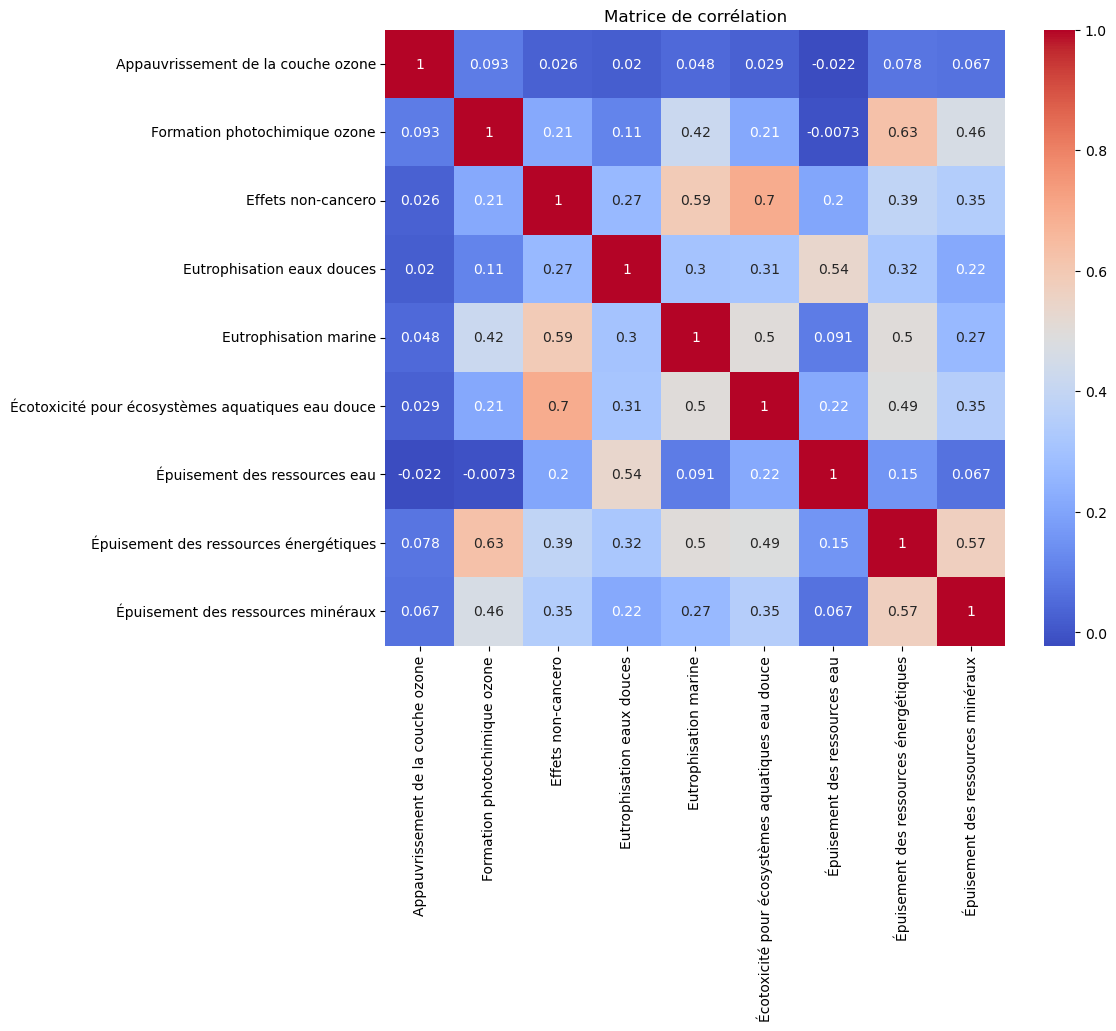

In [38]:
# verifier si ils existe encore des colonnes fortement corrélées
m = matrice_corr(df)

### Encodage des variables catégorielles
Lorsque nous travaillons avec des données contenant des variables catégorielles, il est souvent nécessaire de les encoder numériquement avant d'appliquer certains algorithmes d'apprentissage automatique ou de traitement des données. Dans cette étape, nous allons expliquer pourquoi l'encodage est important, ce qu'est un encoding et à quoi cela sert.

#### Dans notre cas nous avons opté pour : Label Encoding 

**L'étiquetage (label encoding)** est une technique de transformation des variables catégorielles en valeurs numériques. Il consiste à attribuer des étiquettes numériques uniques à chaque catégorie de la variable. Cela permet de représenter les catégories sous forme de nombres afin de les utiliser dans les algorithmes d'apprentissage automatique.

L'étiquetage est souvent utilisé lorsque les catégories d'une variable ont un ordre ou une relation hiérarchique naturelle. Par exemple, les tailles de vêtements (petit, moyen, grand) peuvent être étiquetées comme 0, 1 et 2 respectivement, car elles ont une relation d'ordre.

Voici un exemple simple pour illustrer l'étiquetage :

| Catégorie | Etiquette |
|-------|------|
|   Pomme  |  0   |
|   Banane   |  1   |
|   Orange   |  2   |
|   Fraise   |  3   |
|   Kiwi   |  4   |


Dans cet exemple, chaque catégorie de fruit a été étiquetée avec une valeur numérique unique. Ainsi, les fruits peuvent maintenant être représentés par leurs étiquettes numériques dans les calculs et les analyses.

L'étiquetage est utile car de nombreux algorithmes d'apprentissage automatique requièrent des variables numériques en entrée. En convertissant les variables catégorielles en étiquettes numériques, nous permettons à ces algorithmes de traiter ces variables et de trouver des modèles ou des relations dans les données.

Il est important de noter que l'étiquetage peut ne pas convenir à toutes les situations, en particulier lorsque les variables catégorielles ne présentent pas d'ordre ou de relation hiérarchique clairs. Dans de tels cas, d'autres techniques telles que l'encodage one-hot peuvent être plus appropriées.

En résumé, l'étiquetage est une technique permettant de convertir des variables catégorielles en valeurs numériques uniques. Cela facilite l'utilisation de ces variables dans les algorithmes d'apprentissage automatique et permet de découvrir des modèles dans les données.

In [39]:
df.head()

,Mat-emballage,Appauvrissement de la couche ozone,Formation photochimique ozone,Effets non-cancero,Eutrophisation eaux douces,Eutrophisation marine,Écotoxicité pour écosystèmes aquatiques eau douce,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,LDPE,1.020000e-06,0.03890,7.440000e-08,0.001870,0.01330,44.60,3.10,315.00,0.000088
1,Verre,1.230000e-07,0.00293,1.170000e-08,0.000124,0.00232,5.83,2.52,12.70,0.000007
2,Pas d'emballage,5.450000e-08,0.00107,7.450000e-09,0.000068,0.00212,4.09,3.02,6.23,0.000004
3,LDPE,6.270000e-08,0.00256,1.200000e-08,0.000203,0.00405,5.68,5.29,12.60,0.000005
4,LDPE,1.020000e-06,0.03890,7.440000e-08,0.001870,0.01330,44.60,3.10,315.00,0.000088


**La bibliothèque sklearn (scikit-learn) est une bibliothèque populaire en apprentissage automatique (machine learning) qui fournit des outils pour la préparation des données, la construction de modèles, l'évaluation des performances et bien d'autres fonctionnalités liées à l'apprentissage automatique. Nous l'avons utilisée ici pour utiliser la classe LabelEncoder, qui nous permet d'effectuer l'étiquetage (label encoding) des variables catégorielles dans notre DataFrame. L'étiquetage est utilisé pour convertir des variables catégorielles en valeurs numériques afin de les utiliser dans les modèles d'apprentissage automatique.**

In [40]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()
dataframe_encoded = df.copy()
# Appliquer l'étiquetage a 'mat-emballage'
dataframe_encoded['Mat-emballage'] = label_encoder.fit_transform(df['Mat-emballage'])


In [41]:
dataframe_encoded.head()


,Mat-emballage,Appauvrissement de la couche ozone,Formation photochimique ozone,Effets non-cancero,Eutrophisation eaux douces,Eutrophisation marine,Écotoxicité pour écosystèmes aquatiques eau douce,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,7,1.020000e-06,0.03890,7.440000e-08,0.001870,0.01330,44.60,3.10,315.00,0.000088
1,16,1.230000e-07,0.00293,1.170000e-08,0.000124,0.00232,5.83,2.52,12.70,0.000007
2,15,5.450000e-08,0.00107,7.450000e-09,0.000068,0.00212,4.09,3.02,6.23,0.000004
3,7,6.270000e-08,0.00256,1.200000e-08,0.000203,0.00405,5.68,5.29,12.60,0.000005
4,7,1.020000e-06,0.03890,7.440000e-08,0.001870,0.01330,44.60,3.10,315.00,0.000088


### Normalisation des données

##### **Normalisation min-max**
La normalisation min-max, également connue sous le nom de mise à l'échelle, transforme les données de sorte que toutes les valeurs se situent entre une plage spécifiée, généralement 0 et 1. La formule de la normalisation min-max est la suivante :


**X_norm = (X - X.min()) / (X.max() - X.min())**
Cette formule soustrait la valeur minimale de chaque variable et divise par la différence entre la valeur maximale et la valeur minimale. Ainsi, les valeurs sont ramenées à une plage de 0 à 1.

##### **Normalisation en utilisant StandardScaler**
La normalisation en utilisant StandardScaler, également connue sous le nom de centrage-réduction, transforme les données de manière à ce qu'elles aient une moyenne nulle et un écart type de 1. Cette technique est basée sur la distribution normale des données. La formule de la normalisation en utilisant StandardScaler est la suivante :


**X_scaled = (X - X.mean()) / X.std()**
Cette formule soustrait la moyenne de chaque variable et divise par l'écart type. Ainsi, les données sont centrées autour de zéro et mises à l'échelle en fonction de l'écart type.

#### **Comparaison des résultats**
Dans notre analyse, nous avons testé les deux méthodes de normalisation, min-max et StandardScaler, sur nos données. Nous avons constaté que la normalisation en utilisant StandardScaler a donné de meilleurs résultats en termes de regroupement des données et de performances des algorithmes de clustering. Cela peut être dû au fait que StandardScaler tient compte de la distribution des données et est plus robuste aux valeurs aberrantes.


In [42]:
scaler = sklearn.preprocessing.StandardScaler()

In [43]:
# Liste des colonnes à normaliser
colonnes_normaliser = [colonne for colonne in dataframe_encoded.columns if colonne not in ['Mat-emballage']]

# Copie du DataFrame encodé
dataframe_normalized = dataframe_encoded.copy()

# Normalisation des colonnes
dataframe_normalized[colonnes_normaliser] = scaler.fit_transform(dataframe_encoded[colonnes_normaliser])

In [47]:
dataframe_normalized.head()

,Mat-emballage,Appauvrissement de la couche ozone,Formation photochimique ozone,Effets non-cancero,Eutrophisation eaux douces,Eutrophisation marine,Écotoxicité pour écosystèmes aquatiques eau douce,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,7,0.098949,0.391816,-0.207552,0.504371,-0.296938,-0.147633,-0.145418,4.861614,1.511046
1,16,-0.085323,-0.424066,-0.601453,-0.352199,-0.515851,-0.743028,-0.177533,-0.680095,-0.355292
2,15,-0.099396,-0.466255,-0.628153,-0.379721,-0.519839,-0.769749,-0.149848,-0.798702,-0.421650
3,7,-0.097711,-0.432459,-0.599568,-0.313443,-0.481359,-0.745331,-0.024155,-0.681928,-0.397226
4,7,0.098949,0.391816,-0.207552,0.504371,-0.296938,-0.147633,-0.145418,4.861614,1.511046


In [21]:
dataframe_normalized.describe()

,Mat-emballage,Appauvrissement de la couche ozone,Formation photochimique ozone,Effets non-cancero,Eutrophisation eaux douces,Eutrophisation marine,Écotoxicité pour écosystèmes aquatiques eau douce,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
count,2517.000000,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03,2.517000e+03
mean,8.713548,-9.152613e-18,4.556237e-16,-4.919695e-16,-1.242434e-15,1.425933e-16,-5.431359e-16,-1.909147e-16,5.006810e-16,7.807841e-17
std,4.208991,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,0.000000,-1.100349e-01,-4.878035e-01,-6.673544e-01,-4.065565e-01,-5.578591e-01,-8.221477e-01,-1.596146e+00,-8.815618e-01,-4.931240e-01
25%,7.000000,-8.593973e-02,-4.095496e-01,-5.172701e-01,-3.134425e-01,-4.562382e-01,-6.252389e-01,-2.669578e-01,-5.481060e-01,-3.398539e-01
50%,9.000000,-6.827256e-02,-3.263056e-01,-3.244033e-01,-1.952104e-01,-3.069070e-01,-3.088825e-01,-2.013428e-01,-3.482891e-01,-2.124361e-01
75%,12.000000,5.477612e-03,-8.224414e-02,3.494454e-02,9.856219e-03,8.103997e-03,1.487593e-01,-1.751009e-02,2.089982e-01,6.405837e-02
max,16.000000,4.980944e+01,8.355569e+00,9.439556e+00,1.562926e+01,1.281589e+01,1.590669e+01,2.615042e+01,1.212102e+01,2.921579e+01


## 2.2 Visualisation des données apres le pré-traitement

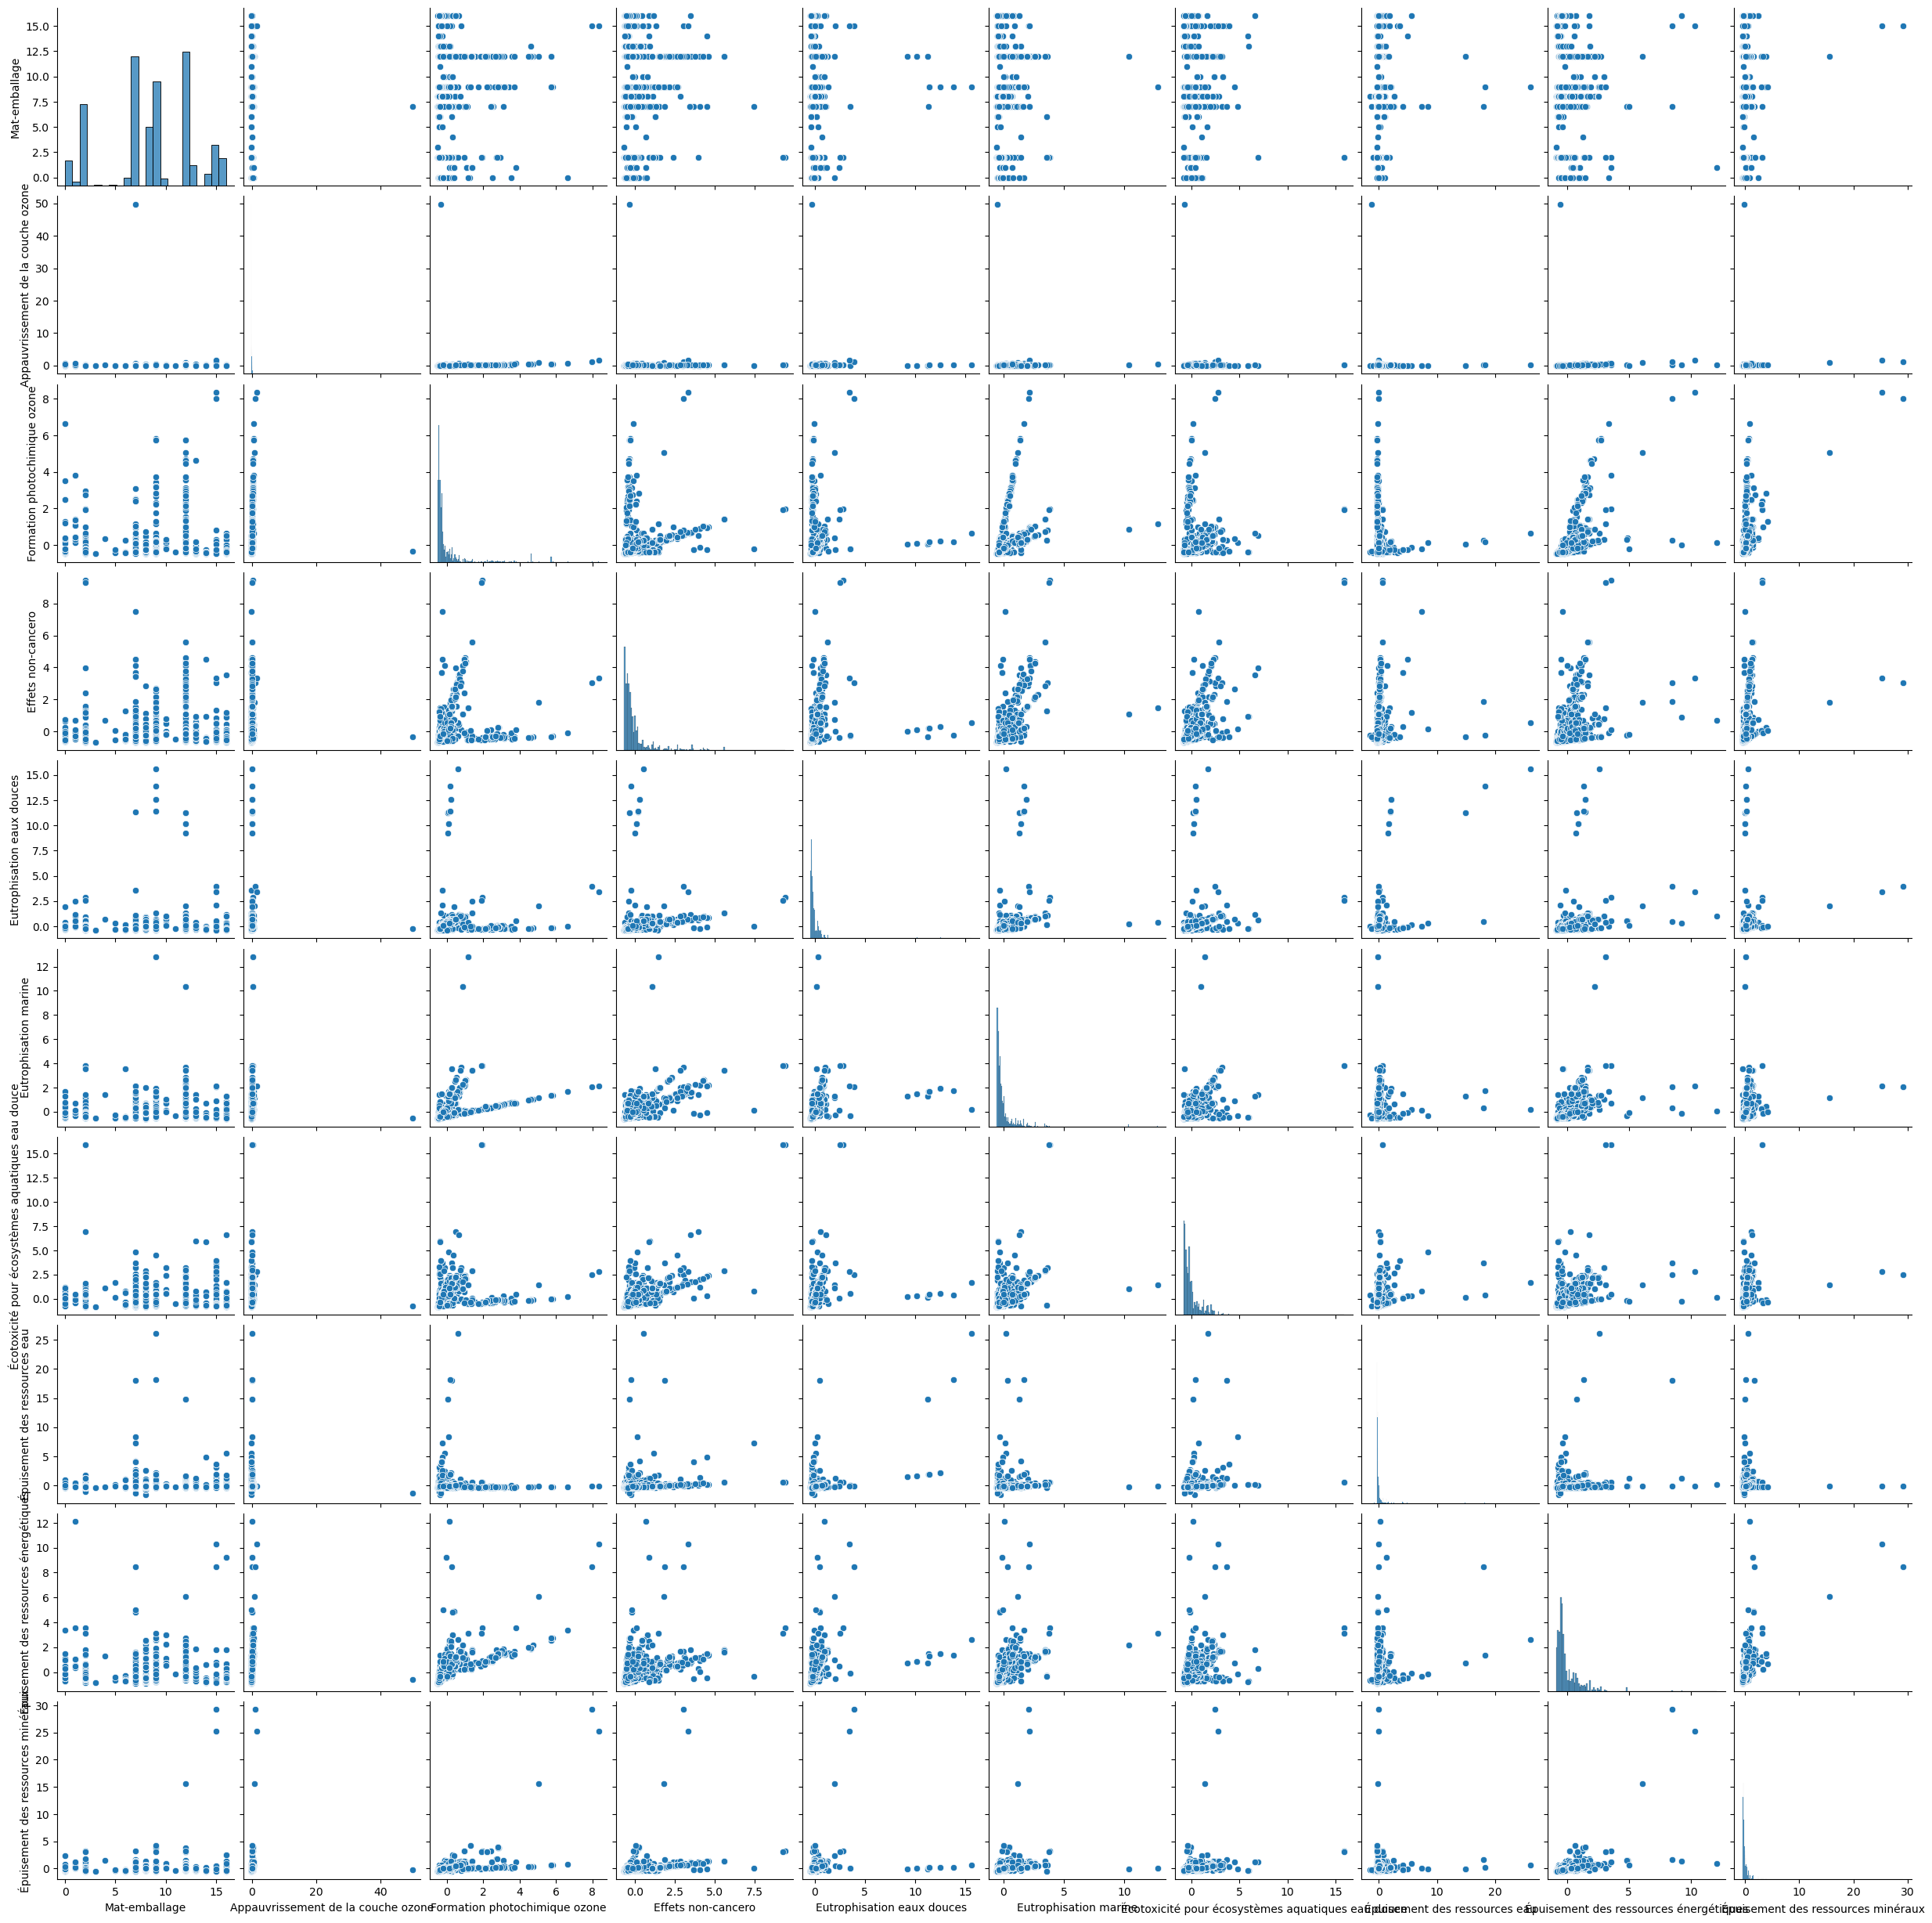

In [46]:
sns.pairplot(dataframe_normalized)

## 2.3 Application d'algorithmes d'apprentissage Non Suppervisé (K-means)

In [45]:
# fixer la graine aléatoire pour la reproductibilité des résultats
seed = 42
np.random.seed(seed)

In [24]:
data_2D = dataframe_normalized[['Mat-emballage', 'Effets non-cancero']]

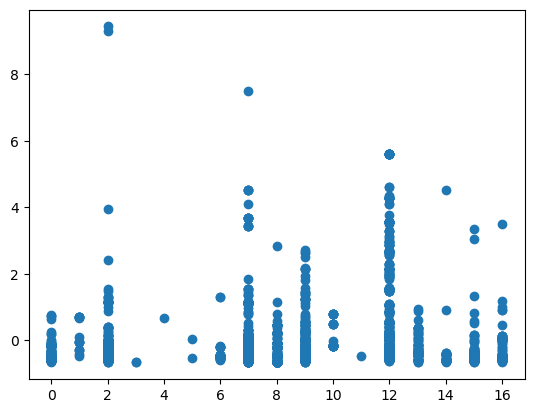

In [25]:
plt.scatter(data_2D['Mat-emballage'],data_2D['Effets non-cancero'],)

### Déterminer la valeur optimale de classe (k)

Le nombre optimal de clusters est : 8 (avec une inertie minimale de 1403.3288079337244)


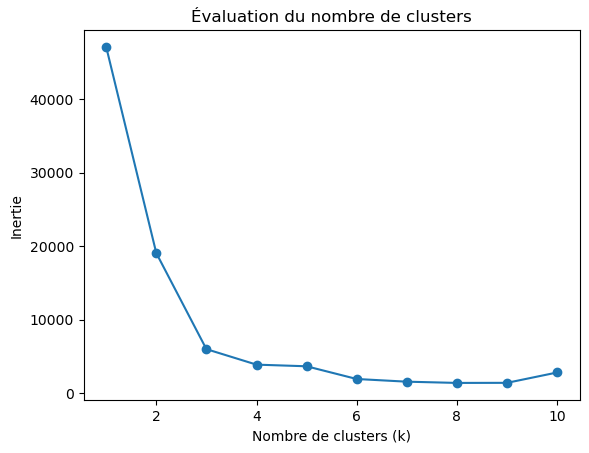

In [48]:
np.random.seed(seed)

def get_k_optimal_interia(data,affiche=False):
    inertie_values = []
    k_values = range(1, 11, 1)
    min_inertie = float('inf')
    best_k = None

    for k in k_values:
        Centroides, DictAffect = clust.kmoyennes(k, data, epsilon=0.01, iter_max=100)
        inertie = clust.inertie_globale(data, DictAffect)
        inertie_values.append(inertie)

        if inertie < min_inertie:
            min_inertie = inertie
            best_k = k

    print(f"Le nombre optimal de clusters est : {best_k} (avec une inertie minimale de {min_inertie})")
    
    if affiche:
        # Afficher le graphique de l'inertie en fonction du nombre de clusters
        plt.plot(k_values, inertie_values, marker='o')
        plt.xlabel('Nombre de clusters (k)')
        plt.ylabel('Inertie')
        plt.title("Évaluation du nombre de clusters")
        plt.show()
    
    return best_k

k = get_k_optimal_interia(data_2D,affiche=True)


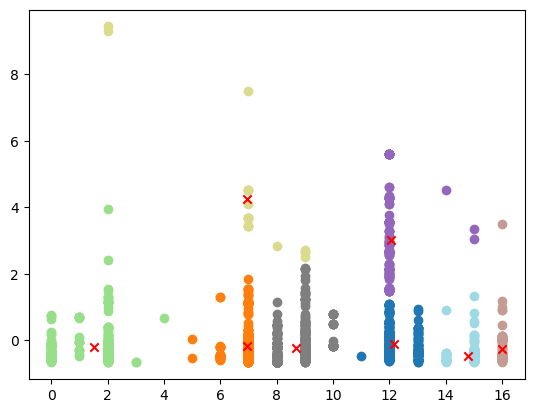

In [49]:
Centroides, DictAffect = clust.kmoyennes(k, data_2D, epsilon=0.01, iter_max=100)
clust.affiche_resultat(data_2D, Centroides, DictAffect)
plt.show()
